# Multiple Linear Regression

## Import the relevant libraries

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

### Load the data

In [70]:
wine_data = pd.read_csv('wine.csv')
wine_data.head(5)

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


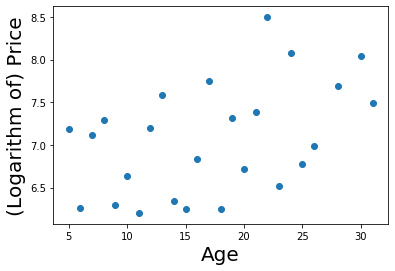

In [71]:
x2 = wine_data['Age']
y = wine_data['Price']

plt.scatter(x2, y)
plt.xlabel('Age', fontsize=20)
plt.ylabel('(Logarithm of) Price', fontsize=20)
plt.show()

### Declare the target (y) and features

In [72]:
y = wine_data['Price']
features = wine_data[['AGST', 'Age']]

### Do the Regression

In [73]:
x = sm.add_constant(features)
ols_model = sm.OLS(y, x).fit()
ols_model.summary()

C:\Users\netfi\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     11.99
Date:                Fri, 24 Jul 2020   Prob (F-statistic):           0.000301
Time:                        04:42:04   Log-Likelihood:                -14.994
No. Observations:                  25   AIC:                             35.99
Df Residuals:                      22   BIC:                             39.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6680      2.376     -1.123      0.274      -7.596       2.260
AGST           0.5630      0.147      3.841      0.001       0.259       0.867
Age            0.0257      0.013      1.994      0.059      -0.001       0.052
==============================================================================
Omnibus:                        1.474   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.479   Jarque-Bera (JB):                1.138
Skew:                           0.294   Prob(JB):                        0.566
Kurtosis:                       2.137   Cond. No.                         621.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In a regression problem, you want the **p-value** to be much **less than 0.05** for the variable to be considered as a significant variable. Typically, a small p-value (< 0.05) suggests that null hypothesis is to be rejected while a large p-value (> 0.05) denotes that null hypothesis is to be accepted due to lack of counter proposition against it. Values equal or nearer to 0.05 suggest that the data scientist can make the call.

https://medium.com/@ODSC/the-importance-of-p-values-in-data-science-6cb7c7380881

In [74]:
# original data
wine_data[['AGST', 'Age', 'Price']].head(3)

,AGST,Age,Price
0,17.1167,31,7.4950
1,16.7333,30,8.0393
2,17.1500,28,7.6858


In [75]:
ols_model.params

const   -2.668047
AGST     0.562957
Age      0.025653
dtype: float64

In [76]:
# prediction    
b0 = ols_model.params[0] 
b1 = ols_model.params[1]
b2 = ols_model.params[2]
# yhat = b0 + b1*x1 + b2*x2
b0 + b1*17.1167 + b2*31

7.763149821016415

In [77]:
new_data = pd.DataFrame({'AGST':[17.1167, 16.7333, 17.1500]})
new_data['Age'] = [31,30,28]
new_data = sm.add_constant(new_data)
new_data

,const,AGST,Age
0,1.0,17.1167,31
1,1.0,16.7333,30
2,1.0,17.1500,28


In [78]:
new_data['Predicted Price'] = ols_model.predict(new_data)
new_data['Actual Price'] = wine_data[['Price']].head(3)
new_data['Error'] = new_data['Actual Price'] - new_data['Predicted Price'] 
new_data[['AGST', 'Age', 'Actual Price', 'Predicted Price', 'Error']]

,AGST,Age,Actual Price,Predicted Price,Error
0,17.1167,31,7.4950,7.763150,-0.268150
1,16.7333,30,8.0393,7.521660,0.517640
2,17.1500,28,7.6858,7.704938,-0.019138


## Using scikit-learn library

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
skmodel = LinearRegression()
skmodel.fit(features, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
skmodel.coef_ ##b1 and b2

array([0.56295698, 0.02565261])

In [82]:
skmodel.intercept_ ##b0

-2.6680467851906418

In [83]:
r2 = skmodel.score(features, y)
f"Rsquared = {r2}"

'Rsquared = 0.5214679510151651'

In [84]:
n = features.shape[0]
p = features.shape[1]
r2adj = 1 - (1-r2) * ((n - 1)/(n - p -1))
newline = "\r\n"
print(f"(n, p) = {features.shape}{newline}adjRsquared = {r2adj}")

(n, p) = (25, 2)
adjRsquared = 0.4779650374710892


In [85]:
new_data = pd.DataFrame({'AGST':[17.1167, 16.7333, 17.1500]})
new_data['Age'] = [31,30,28]
new_data

,AGST,Age
0,17.1167,31
1,16.7333,30
2,17.1500,28


In [86]:
new_data['Predicted Price'] = skmodel.predict(new_data)
new_data['Actual Price'] = wine_data[['Price']].head(3)
new_data['Error'] = new_data['Actual Price'] - new_data['Predicted Price'] 
new_data[['AGST', 'Age', 'Actual Price', 'Predicted Price', 'Error']]

,AGST,Age,Actual Price,Predicted Price,Error
0,17.1167,31,7.4950,7.763150,-0.268150
1,16.7333,30,8.0393,7.521660,0.517640
2,17.1500,28,7.6858,7.704938,-0.019138


### Using 3 Features

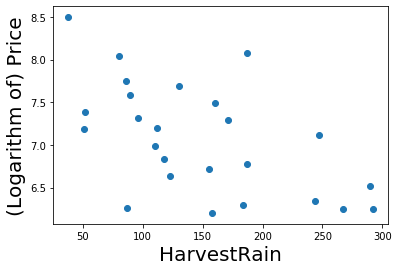

In [87]:
x2 = wine_data['HarvestRain']
y = wine_data['Price']

plt.scatter(x2, y)
plt.xlabel('HarvestRain', fontsize=20)
plt.ylabel('(Logarithm of) Price', fontsize=20)
plt.show()

In [88]:
y = wine_data['Price']
features = wine_data[['AGST', 'Age', 'HarvestRain']]

x = sm.add_constant(features)
ols_model = sm.OLS(y, x).fit()
ols_model.summary()

C:\Users\netfi\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     26.34
Date:                Fri, 24 Jul 2020   Prob (F-statistic):           2.60e-07
Time:                        04:42:06   Log-Likelihood:                -4.6965
No. Observations:                  25   AIC:                             17.39
Df Residuals:                      21   BIC:                             22.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.4778      1.627     -0.908      0.374      -4.862       1.907
AGST            0.5323      0.100      5.348      0.000       0.325       0.739
Age             0.0251      0.009      2.875      0.009       0.007       0.043
HarvestRain    -0.0045      0.001     -5.183      0.000      -0.006      -0.003
==============================================================================
Omnibus:                        0.770   Durbin-Watson:                   2.345
Prob(Omnibus):                  0.681   Jarque-Bera (JB):                0.771
Skew:                          -0.211   Prob(JB):                        0.680
Kurtosis:                       2.251   Cond. No.                     4.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Predictions

In [89]:
# original data
wine_data[['AGST', 'Age', 'HarvestRain',  'Price']].head(3)

,AGST,Age,HarvestRain,Price
0,17.1167,31,160,7.4950
1,16.7333,30,80,8.0393
2,17.1500,28,130,7.6858


In [90]:
new_data = pd.DataFrame({'AGST':[17.1167, 16.7333, 17.1500]})
new_data['Age'] = [31,30,28]
new_data['HarvestRain'] = [160,80,130]
new_data = sm.add_constant(new_data)
new_data

,const,AGST,Age,HarvestRain
0,1.0,17.1167,31,160
1,1.0,16.7333,30,80
2,1.0,17.1500,28,130


In [91]:
new_data['Predicted Price'] = ols_model.predict(new_data)
new_data['Actual Price'] = wine_data[['Price']].head(3)
new_data['Error'] = new_data['Actual Price'] - new_data['Predicted Price'] 
new_data[['AGST', 'Age', 'HarvestRain', 'Actual Price', 'Predicted Price', 'Error']]

,AGST,Age,HarvestRain,Actual Price,Predicted Price,Error
0,17.1167,31,160,7.4950,7.684806,-0.189806
1,16.7333,30,80,8.0393,7.818725,0.220575
2,17.1500,28,130,7.6858,7.763426,-0.077626
